In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy import stats
from scipy.stats import permutation_test

In [6]:
df1 = pd.read_csv('data.csv')


In [7]:
df = df1.drop(df1[df1['blocktype'] == "self"].index)
df = df.drop(df[df['blocktype'] == "advice"].index)
df = df.drop(df[df['blocktype'] == "4"].index)

In [8]:
ids = df["id"].values
unique_ids = set(ids)
rewards = df["choice"].values
blocktype = df["blocktype"].values
paranoia = df["RGPTS_persecution"].values
trialnums = df["trialnum"].values
reactime = df["rt"].values

In [9]:
tot_rewards_id = {}
tot_rewards_advice = {}
tot_rewards_self = {}
tot_self = {}
tot_advice = {}
tot_paranoia = {}
tot_reac_time = {}
for id in unique_ids:
  tot_rewards_id[id] = 0
  tot_self[id] = 0
  tot_advice[id] = 0
  tot_paranoia[id] = 0
  tot_rewards_advice[id] = 0
  tot_rewards_self[id] = 0
  tot_reac_time[id] = 0
for i in range(len(ids)):
  tot_rewards_id[ids[i]] += int(rewards[i])
  if trialnums[i] == 4:
    tot_self[ids[i]] = int(rewards[i])
  tot_paranoia[ids[i]] = paranoia[i]

In [10]:
tot_paranoia = {}
tot_reac_time = {}
tot_cnt = {}
for id in unique_ids:
  tot_paranoia[id] = 0
for i in range(15):
  tot_reac_time[i] = 0;
  tot_cnt[i] = 0;
for i in range(len(ids)):
  #tot_rewards_id[ids[i]] += int(rewards[i])
  tot_reac_time[trialnums[i]] += reactime[i]
  tot_cnt[trialnums[i]] += 1
  tot_paranoia[ids[i]] = paranoia[i]

In [11]:
tot_self = list(tot_self.values())
tot_advice = list(tot_advice.values())
tot_paranoia = list(tot_paranoia.values())
tot_rewards_id = list(tot_rewards_id.values())
tot_rewards_self = list(tot_rewards_self.values())
tot_rewards_advice = list(tot_rewards_advice.values())
#tot_rewards_self = tot_rewards_self / mean(tot_rewards_self)
#tot_rewards_advice = tot_rewards_advice / mean(tot_rewards_advice)
#for i in range(len(tot_rewards_advice)):
#  tot_rewards_self[i] = tot_rewards_self[i] / tot_rewards_advice[i]

In [12]:
tot_reac_time = np.array(list(tot_reac_time.values()))
tot_cnt = np.array(list(tot_cnt.values()))
#tot_reac_time = tot_reac_time / tot_cnt
tot_reac_time = tot_reac_time/60

In [13]:
tot_paranoia_dict_1 = {}
tot_paranoia_dict_0 = {}
for i in paranoia:
  tot_paranoia_dict_1[i] = 1
  tot_paranoia_dict_0[i] = 1
for i in range(len(tot_paranoia)):
  if tot_self[i] == 1:
    tot_paranoia_dict_1[tot_paranoia[i]] += 1
  else:
    tot_paranoia_dict_0[tot_paranoia[i]] += 1
paranoias = list(tot_paranoia_dict_0.keys())
tot_paranoia_dict_1 = list(tot_paranoia_dict_1.values())
tot_paranoia_dict_0 = list(tot_paranoia_dict_0.values())
ratio = np.array(tot_paranoia_dict_1 / np.array(tot_paranoia_dict_0))

SpearmanrResult(correlation=-0.45015220672815615, pvalue=0.004034634740390612)


Text(10, 19, 'Spearmann: -0.677')

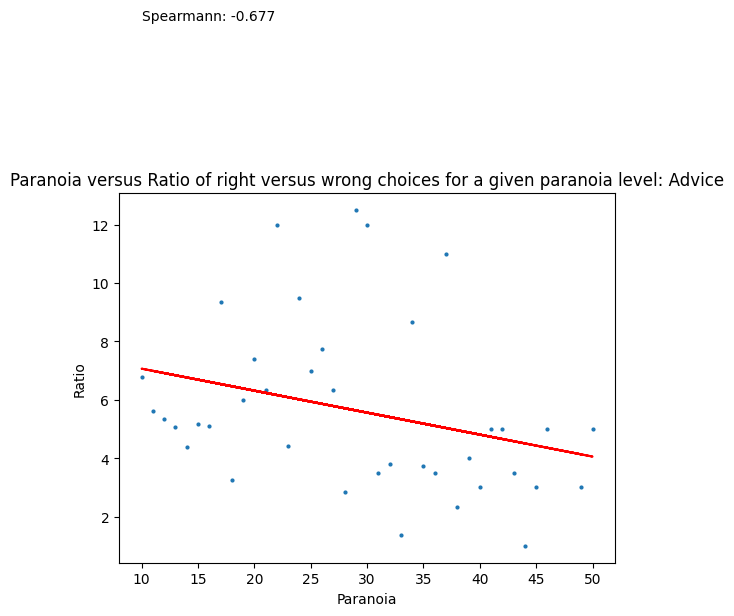

In [14]:
a, b = np.polyfit(paranoias, ratio, 1)
spearman = stats.spearmanr(paranoias, ratio)
print(spearman)
plt.plot(paranoias, a*np.array(paranoias)+b, color="red")
plt.scatter(paranoias, ratio, s=4)
plt.title("Paranoia versus Ratio of right versus wrong choices for a given paranoia level: Advice")
plt.xlabel("Paranoia")
plt.ylabel("Ratio")
plt.text(10, 19, f"Spearmann: -0.677")
#plt.scatter(tot_paranoia, tot_rewards_advice)

SpearmanrResult(correlation=-0.45015220672815615, pvalue=0.004034634740390612)


Text(10, 12, 'Spearmann: -0.450')

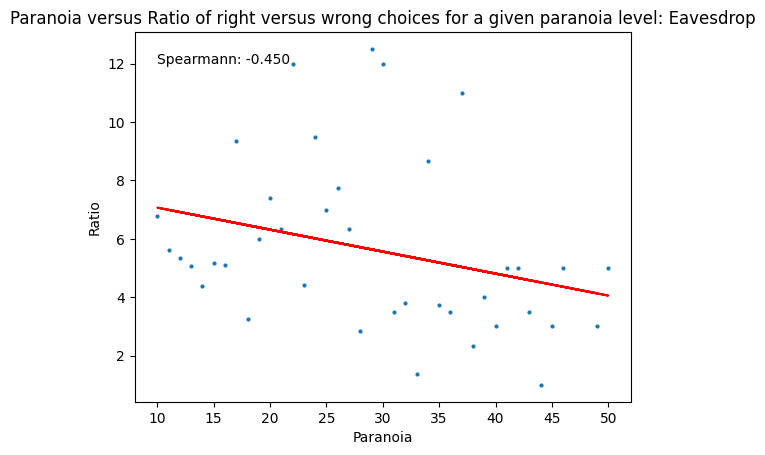

In [15]:
a, b = np.polyfit(paranoias, ratio, 1)
spearman = stats.spearmanr(paranoias, ratio)
print(spearman)
plt.plot(paranoias, a*np.array(paranoias)+b, color="red")
plt.scatter(paranoias, ratio, s=4)
plt.title("Paranoia versus Ratio of right versus wrong choices for a given paranoia level: Eavesdrop")
plt.xlabel("Paranoia")
plt.ylabel("Ratio")
plt.text(10, 12, f"Spearmann: -0.450")
#plt.scatter(tot_paranoia, tot_rewards_advice)

SpearmanrResult(correlation=-0.45015220672815615, pvalue=0.004034634740390612)


Text(10, 7.5, 'Spearmann: -0.203')

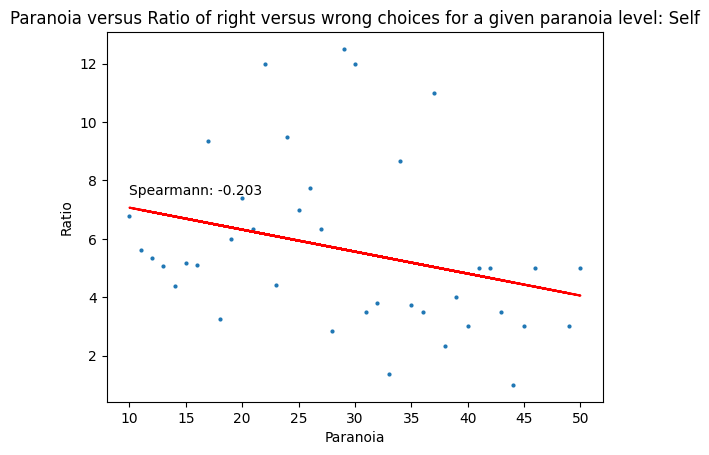

In [16]:
a, b = np.polyfit(paranoias, ratio, 1)
spearman = stats.spearmanr(paranoias, ratio)
print(spearman)
plt.plot(paranoias, a*np.array(paranoias)+b, color="red")
plt.scatter(paranoias, ratio, s=4)
plt.title("Paranoia versus Ratio of right versus wrong choices for a given paranoia level: Self")
plt.xlabel("Paranoia")
plt.ylabel("Ratio")
plt.text(10, 7.5, f"Spearmann: -0.203")
#plt.scatter(tot_paranoia, tot_rewards_advice)

Text(0.5, 0, 'Trial number')

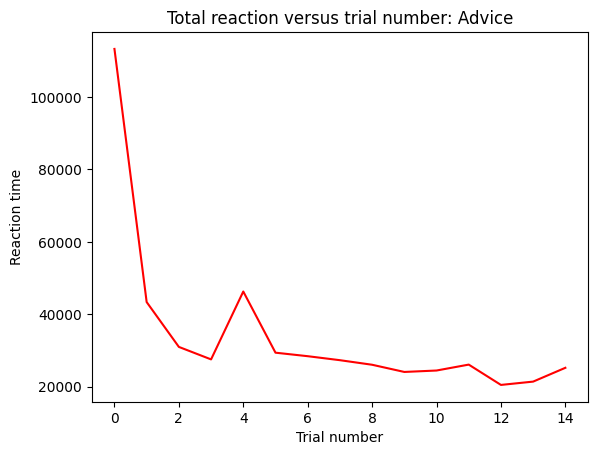

In [17]:
plt.plot(tot_reac_time, color="red")
plt.title("Total reaction versus trial number: Advice")
plt.ylabel("Reaction time")
plt.xlabel("Trial number")

Text(0.5, 0, 'Trial number')

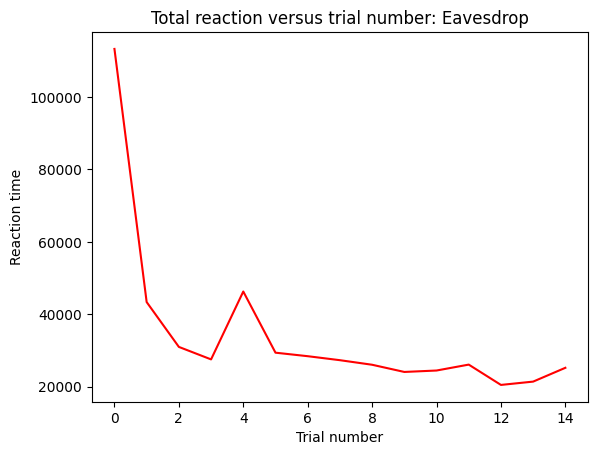

In [18]:
plt.plot(tot_reac_time, color="red")
plt.title("Total reaction versus trial number: Eavesdrop")
plt.ylabel("Reaction time")
plt.xlabel("Trial number")

Text(0.5, 0, 'Trial number')

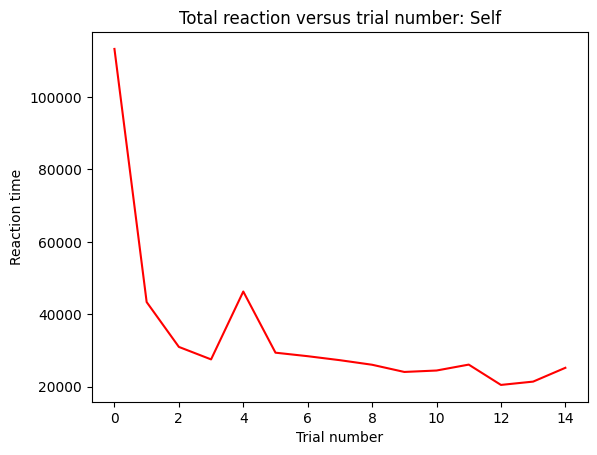

In [19]:
plt.plot(tot_reac_time, color="red")
plt.title("Total reaction versus trial number: Self")
plt.ylabel("Reaction time")
plt.xlabel("Trial number")

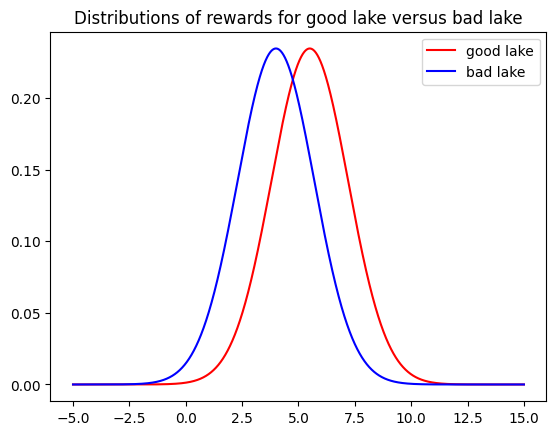

In [20]:
 
## generate the data and plot it for an ideal normal curve
  
## x-axis for the plot
x_data = np.arange(-5, 15, 0.001)
  
## y-axis as the gaussian
y_data_1 = stats.norm.pdf(x_data, 5.5, 1.7)
y_data_2 = stats.norm.pdf(x_data, 4, 1.7)

  
## plot data
plt.plot(x_data, y_data_1, color="red", label="good lake")
plt.plot(x_data, y_data_2, color="blue", label="bad lake")
plt.title("Distributions of rewards for good lake versus bad lake")
plt.legend()

In [21]:
df = df1.drop(df1[df1['blocktype'] == "4"].index)
df = df.drop(df[df['blocktype'] == "advice"].index)
df = df.drop(df[df['blocktype'] == "self"].index)
df_4 = df[df['trialnum'] == 4]
df_5 = df[df['trialnum'] == 5]
r4 = df_4["rt"].values
r5 = df_5["rt"].values

In [22]:
def t_test(x, y, axis):
    n1 = len(x)
    n2 = len(y)
    mean1 = sum(x) / n1
    mean2 = sum(y) / n2
    var1 = sum((xi - mean1)**2 for xi in x) / (n1 - 1)
    var2 = sum((yi - mean2)**2 for yi in y) / (n2 - 1)
    s = ((var1 / n1) + (var2 / n2))**0.5
    t = (mean1 - mean2) / s
    df = n1 + n2 - 2
    p = (1 - stats.t.cdf(abs(t), df)) * 2
    return t

In [23]:
res = permutation_test((r4, r5), t_test, vectorized=True, n_resamples=100000, alternative='less')

Text(0.5, 1.0, 'Results of permuation test: Eavesdrop')

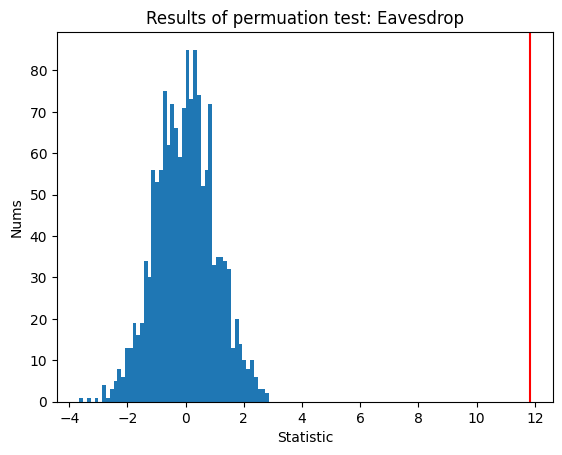

In [24]:
plt.hist(res.null_distribution, bins=50)
plt.axvline(x=res.statistic, color='r')
plt.xlabel("Statistic")
plt.ylabel("Nums")
plt.title("Results of permuation test: Eavesdrop")

In [25]:
df = df1.drop(df1[df1['blocktype'] == "4"].index)
df = df.drop(df[df['blocktype'] == "eavesdrop"].index)
df = df.drop(df[df['blocktype'] == "self"].index)
df_4 = df[df['trialnum'] == 4]
df_5 = df[df['trialnum'] == 5]
r4 = df_4["rt"].values
r5 = df_5["rt"].values

In [26]:
res = permutation_test((r4, r5), t_test, vectorized=True, n_resamples=100000, alternative='less')

Text(0.5, 1.0, 'Results of permuation test: Advice')

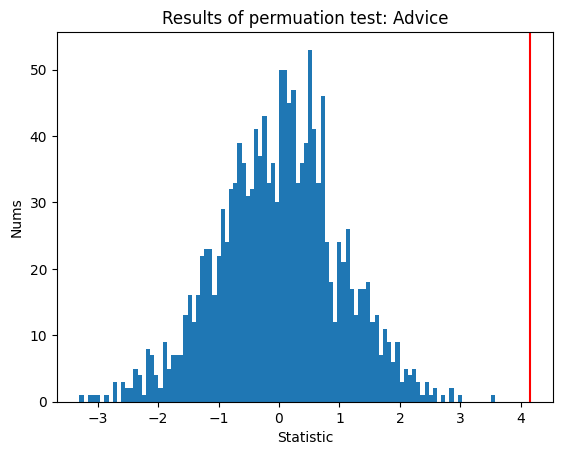

In [27]:
plt.hist(res.null_distribution, bins=100)
plt.axvline(x=res.statistic, color='r')
plt.xlabel("Statistic")
plt.ylabel("Nums")
plt.title("Results of permuation test: Advice")

In [28]:
from scipy.stats import permutation_test
df = df1.drop(df1[df1['blocktype'] == "4"].index)
df = df.drop(df[df['blocktype'] == "eavesdrop"].index)
df = df.drop(df[df['blocktype'] == "advice"].index)
df_4 = df[df['trialnum'] == 4]
df_5 = df[df['trialnum'] == 5]
r4 = df_4["rt"].values
r5 = df_5["rt"].values

In [29]:
res = permutation_test((r4, r5), t_test, vectorized=True, n_resamples=100000, alternative='less')

Text(0.5, 1.0, 'Results of permuation test: Self')

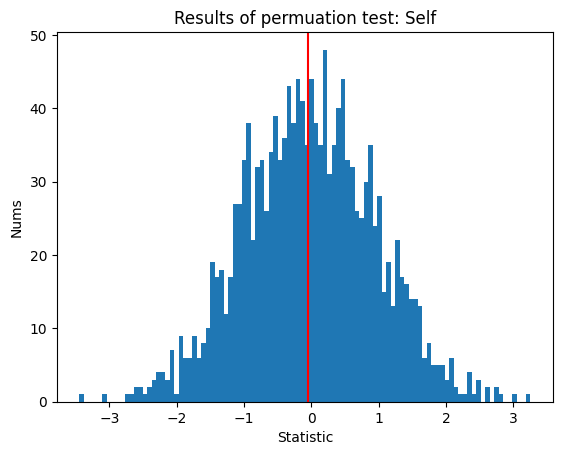

In [30]:
plt.hist(res.null_distribution, bins=100)
plt.axvline(x=res.statistic, color='r')
plt.xlabel("Statistic")
plt.ylabel("Nums")
plt.title("Results of permuation test: Self")

In [39]:
import pandas as pd

# Step 1: Read the CSV file and select necessary columns
df = pd.read_csv("data.csv", usecols=['id', 'trialnum', 'choice', 'blocktype', 'RGPTS_persecution', 'puzzle_score'])

# Print unique values of blocktype before filtering
print("Unique values of blocktype before filtering:", df['blocktype'].unique())

# Step 1.5: Drop rows where blocktype equals 4
df = df[df['blocktype'] != '4']

# Print unique values of blocktype after filtering
print("Unique values of blocktype after filtering:", df['blocktype'].unique())

# Step 2: Group by blocktype
grouped = df.groupby('blocktype')

# Step 3: Define function to calculate convergence time
def calculate_convergence_time(group):
    consecutive_ones = 0
    for choice in group['choice']:
        if choice == 1:
            consecutive_ones += 1
        else:
            break
    return 15 - consecutive_ones

# Step 4: Calculate convergence time for each unique id and create a new dataframe
conv_times = []
for name, group in grouped:
    group = group.groupby('id').apply(calculate_convergence_time).reset_index(name='conv_time')
    group['blocktype'] = name
    conv_times.append(group)

conv_times_df = pd.concat(conv_times)

print(conv_times_df)


Unique values of blocktype before filtering: ['4' 'advice' 'eavesdrop' 'self']
Unique values of blocktype after filtering: ['advice' 'eavesdrop' 'self']
              id  conv_time blocktype
0        3323428         15    advice
1        4266797          1    advice
2        4557132         14    advice
3        8916873         14    advice
4        9265142         14    advice
...          ...        ...       ...
1493  9984809104         13      self
1494  9985909047         15      self
1495  9992758504         11      self
1496  9993563717          1      self
1497  9993980123          4      self

[4494 rows x 3 columns]


In [40]:

# Step 5: Add persecution score to the dataframe
persecution_score = df.groupby('id')[['RGPTS_persecution']].mean().reset_index()
persecution_score.columns = ['id', 'RGPTS_persecution_score']

# Step 6: Merge the average persecution score with conv_times_df
conv_times_df = pd.merge(conv_times_df, persecution_score, on='id', how='left')
print(conv_times_df)

# Step 7: Add fluid intelligence to the dataframe
puzzle_score = df.groupby('id')[['puzzle_score']].mean().reset_index()
puzzle_score.columns = ['id', 'puzzle_score']

# Step 8: Merge the average fluid intelligence with conv_times_df
conv_times_df = pd.merge(conv_times_df, puzzle_score, on='id', how='left')
print(conv_times_df)


              id  conv_time blocktype  RGPTS_persecution_score
0        3323428         15    advice                     22.0
1        4266797          1    advice                     10.0
2        4557132         14    advice                     10.0
3        8916873         14    advice                     17.0
4        9265142         14    advice                     23.0
...          ...        ...       ...                      ...
4489  9984809104         13      self                     16.0
4490  9985909047         15      self                     15.0
4491  9992758504         11      self                     10.0
4492  9993563717          1      self                     12.0
4493  9993980123          4      self                     18.0

[4494 rows x 4 columns]


In [41]:
import numpy as np
import statsmodels.api as sm

IVs = conv_times_df[['RGPTS_persecution_score', 'blocktype']]
DV = conv_times_df['conv_time']

# Convert DV to numeric
DV = DV.astype(float)

IVs = pd.get_dummies(IVs, columns=['blocktype'])
# Convert IVs to numeric
IVs = IVs.astype(float)

# Add constant term to IVs for the regression model
IVs = sm.add_constant(IVs)

# Perform linear regression
model = sm.OLS(DV, IVs).fit()

# Print regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              conv_time   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     18.23
Date:                Wed, 08 May 2024   Prob (F-statistic):           9.33e-12
Time:                        18:42:09   Log-Likelihood:                -13285.
No. Observations:                4494   AIC:                         2.658e+04
Df Residuals:                    4490   BIC:                         2.660e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [42]:
import numpy as np
import statsmodels.api as sm

IVs = conv_times_df[['RGPTS_persecution_score', 'blocktype', 'puzzle_score']]
DV = conv_times_df['conv_time']

# Convert DV to numeric
DV = DV.astype(float)

IVs = pd.get_dummies(IVs, columns=['blocktype'])
# Convert IVs to numeric
IVs = IVs.astype(float)

# Add constant term to IVs for the regression model
IVs = sm.add_constant(IVs)

# Perform linear regression
model = sm.OLS(DV, IVs).fit()

# Print regression summary
print(model.summary())


KeyError: "['puzzle_score'] not in index"

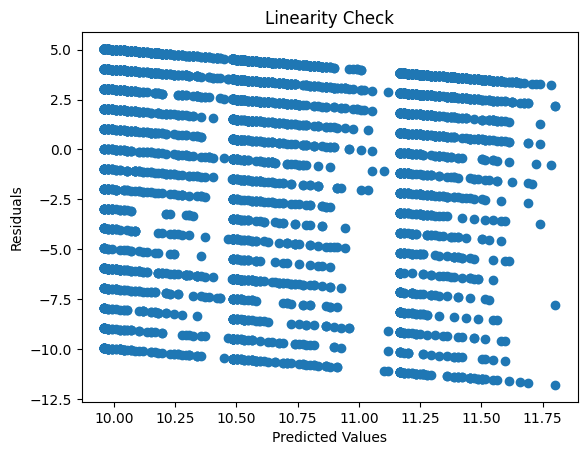

Durbin-Watson statistic: 1.9711245140113787


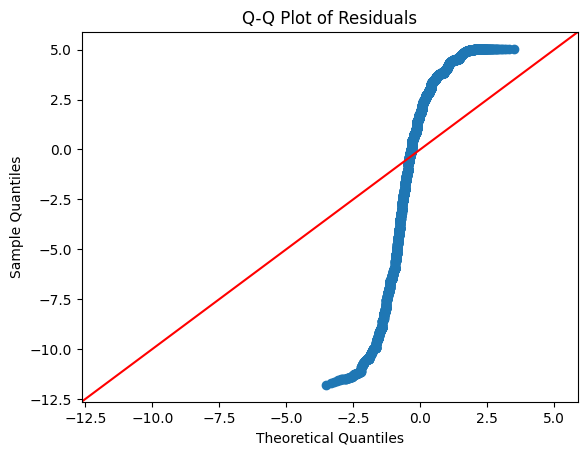

Data is not normally distributed (Shapiro-Wilk test).
p-value:  0.0
Data may be normally distributed (Shapiro-Wilk test).
p-value:  1.0


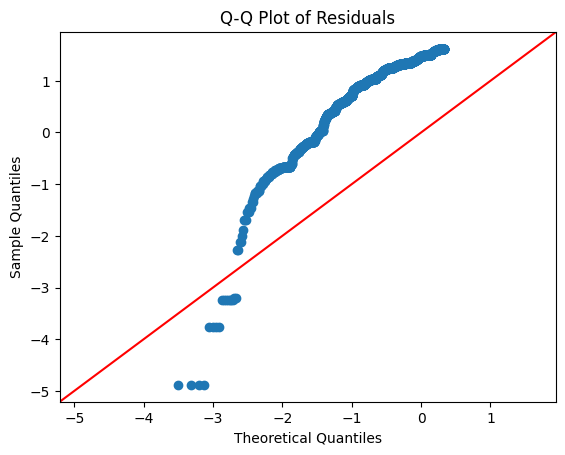

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.stattools import durbin_watson

# Residuals and predicted values
residuals = model.resid
predicted = model.predict()

# Linearity (visual inspection)
plt.scatter(predicted, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Linearity Check")
plt.show()

# Independence of Errors (Durbin-Watson test)
dw_statistic = durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_statistic)

sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

shapiro_test = stats.shapiro(residuals)
if shapiro_test.pvalue < 0.05:
    print("Data is not normally distributed (Shapiro-Wilk test).")
    print("p-value: ", shapiro_test.pvalue)
else:
    print("Data may be normally distributed (Shapiro-Wilk test).")
    print("p-value: ", shapiro_test.pvalue)


def transform_data(data):
    # Try log transformation first
    log_data = np.log(data)
    shapiro_test = stats.shapiro(log_data)
    if shapiro_test.pvalue >= 0.05:
        return log_data
    return data

transformed_data = transform_data(residuals)

shapiro_test = stats.shapiro(transformed_data)
if shapiro_test.pvalue < 0.05:
    print("Data is not normally distributed (Shapiro-Wilk test).")
    print("p-value: ", shapiro_test.pvalue)
else:
    print("Data may be normally distributed (Shapiro-Wilk test).")
    print("p-value: ", shapiro_test.pvalue)

sm.qqplot(transformed_data, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()



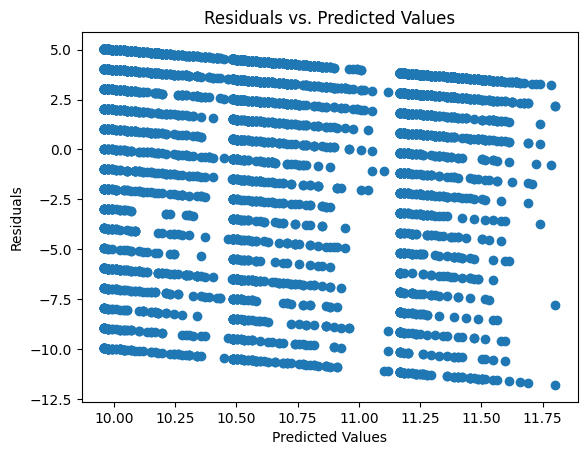

Breusch-Pagan Test p-value: 0.00025436658156863327
White Test p-value: 2.6137779139505593e-05
                            OLS Regression Results                            
Dep. Variable:              conv_time   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     6009.
Date:                Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                        02:37:19   Log-Likelihood:                -13285.
No. Observations:                4494   AIC:                         2.658e+04
Df Residuals:                    4490   BIC:                         2.660e+04
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

# Get residuals
residuals = model.resid

# Get predicted values
predicted_values = model.fittedvalues

# Plot residuals vs. predicted values
plt.scatter(predicted_values, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(residuals, model.model.exog)

# Get p-value from the test
p_value = bp_test[1]
print("Breusch-Pagan Test p-value:", p_value)

# Perform White test
white_test = het_white(residuals, model.model.exog)

# Get p-value from the test
p_value_white = white_test[1]
print("White Test p-value:", p_value_white)

model = sm.OLS(DV, IVs).fit(cov_type='HC3')

# Print regression summary
print(model.summary())

# Check for heteroscedasticity using Breusch-Pagan Test
bp_test = het_breuschpagan(model.resid, IVs)
print("Breusch-Pagan Test p-value:", bp_test[1])

# Check for heteroscedasticity using White Test
white_test = het_white(model.resid, IVs)
print("White Test p-value:", white_test[1])
